In [50]:
from __future__ import absolute_import, division, print_function
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

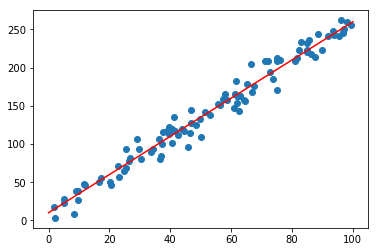

In [51]:
# Generate the synthetic data
a =2.5
b = 10
sigma = 10
X = np.random.rand(100)*100
Y = a*X+b+np.random.randn(100)*10
plt.scatter(X,Y)
plt.plot([0,100],[10,260],color='red')
plt.show()

step 0: loss is 330321.69
step 10: loss is 165452.61
step 20: loss is 90084.73
step 30: loss is 17928.31
step 40: loss is 18451.93
step 50: loss is 15904.66
step 60: loss is 13596.19
step 70: loss is 13196.86
step 80: loss is 13111.11
step 90: loss is 12882.16
step 100: loss is 12828.38
step 110: loss is 12791.33
step 120: loss is 12755.00
step 130: loss is 12726.36
step 140: loss is 12704.63
step 150: loss is 12688.03
step 160: loss is 12675.37
step 170: loss is 12665.79
step 180: loss is 12658.65
step 190: loss is 12653.39
step 200: loss is 12649.58
step 210: loss is 12646.85
step 220: loss is 12644.93
step 230: loss is 12643.59
step 240: loss is 12642.67
step 250: loss is 12642.05
step 260: loss is 12641.63
step 270: loss is 12641.36
step 280: loss is 12641.18
The regression model is y = 2.52x+8.56


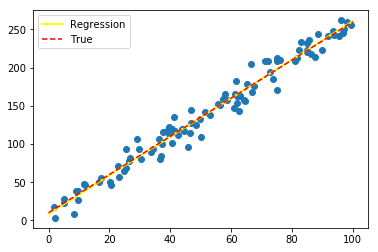

In [52]:
# Preprocess the input
X = X.reshape([-1,1])
Y = Y.reshape([-1,1])

# begin tf modeling
x_ = tf.placeholder(tf.float32,[None,1])
y_ = tf.placeholder(tf.float32,[None,1])
a = tf.Variable(np.random.rand(),dtype=tf.float32)
b = tf.Variable(np.random.rand(),dtype=tf.float32)
output_y = a*x_+b
loss = tf.reduce_sum(tf.square(output_y-y_))
trainstep = tf.train.AdamOptimizer(1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prevloss = 0
    for i in range(2000):
        trainstep.run({x_:X,y_:Y})
        currentloss = loss.eval({x_:X,y_:Y})
        if i%10==0:
            print("step %d: loss is %.2f"%(i,currentloss))
        if np.abs(currentloss-prevloss)<1e-2:
            break
        else:
            prevloss = currentloss
    a = a.eval()
    b = b.eval()
    print("The regression model is y = %.2fx+%.2f"%(a,b))

plt.scatter(X,Y)
plt.plot([0,100],[b,100*a+b],color='yellow',linewidth=2)
plt.plot([0,100],[10,260],'r--')
plt.legend(["Regression","True"])
plt.show()    